In [2]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import os
  CWD = '/content/drive/MyDrive/DataSources/SkinCare'
  os.chdir(CWD)
except:None
G_path = './Project_Data'

In [3]:
import pandas as pd
import os
import pickle
import sklearn as sk
from sklearn import *
import matplotlib.pyplot as plt
import torch.nn.functional as F
pd.options.display.max_colwidth = 300
import features
from features.usefull_functions import *
from features.NETs import *
from features.Model_Training import *

In [20]:
grid_label = ['CNN_280x210','15_Jul22_07_24'] #[CNN_280x210_MultiClassModel0_24_Jun22_22-38]
# grid_label = ['A_E_CNN','A_E_CNN_Model6_22_Jun22_00-29']

models_list = os.listdir(G_path  + '/08_Saved_Models_Outpus/Grid_Search_Results/')
models_list = [i for i in models_list if all(s in i for s in grid_label)]
len(models_list)

18

Mode:  CNN_280x210_MultiClassModel11_15_Jul22_07_24
Hyper params:      {'Drop': 0.2, 'LR': 0.00175, 'Momentum': 0.9, 'Net': <class 'features.NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0}
Name: hyper_param, dtype: object
Valid Accuracy  0.692874692874693
Valid Specificity:  0.9040021453612439
Train Loss:  0.3101916490766581
Valid Loss:  1.1414264927892124


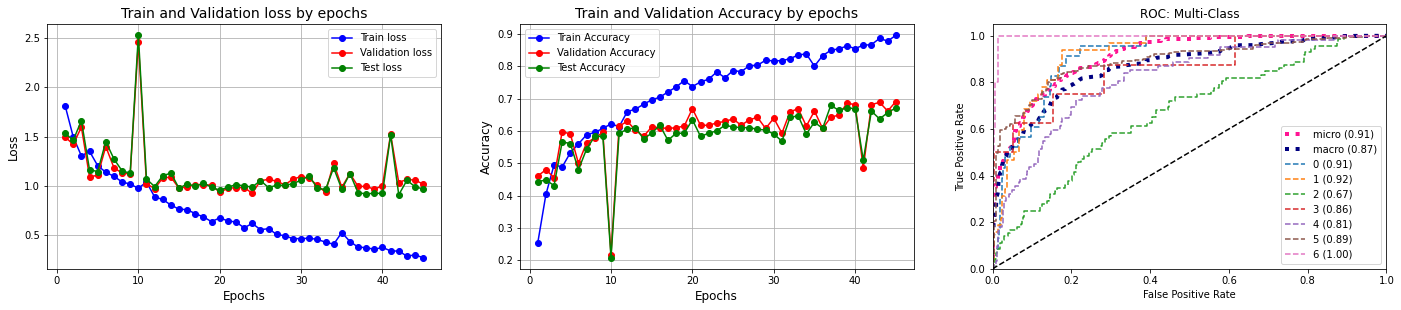

Mode:  CNN_280x210_MultiClassModel7_15_Jul22_07_24
Hyper params:      {'Drop': 0.25, 'LR': 0.0015, 'Momentum': 0.88, 'Net': <class 'features.NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0}
Name: hyper_param, dtype: object
Valid Accuracy  0.683046683046683
Valid Specificity:  0.9172748470430173
Train Loss:  0.3334582608049798
Valid Loss:  1.0840713834061342


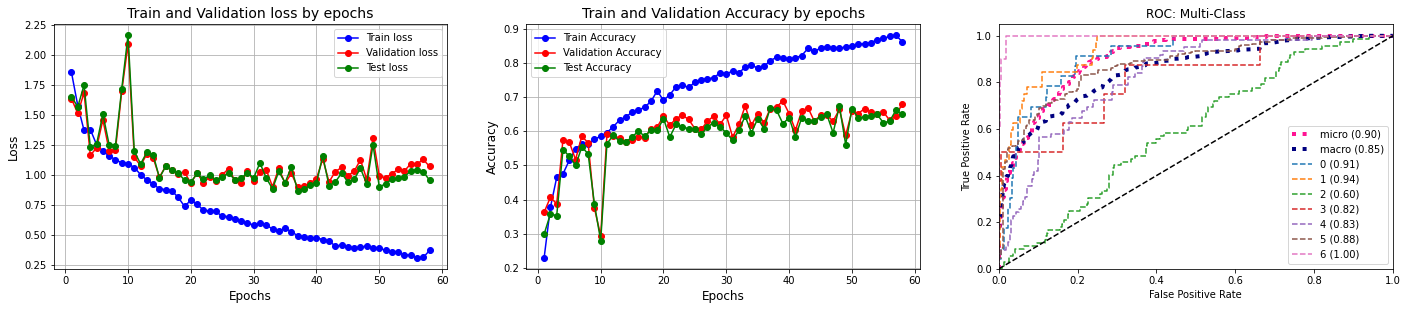

Mode:  CNN_280x210_MultiClassModel8_15_Jul22_07_24
Hyper params:      {'Drop': 0.25, 'LR': 0.0015, 'Momentum': 0.9, 'Net': <class 'features.NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0}
Name: hyper_param, dtype: object
Valid Accuracy  0.6953316953316954
Valid Specificity:  0.9171704113930971
Train Loss:  0.31293597768938647
Valid Loss:  1.0476457122494194


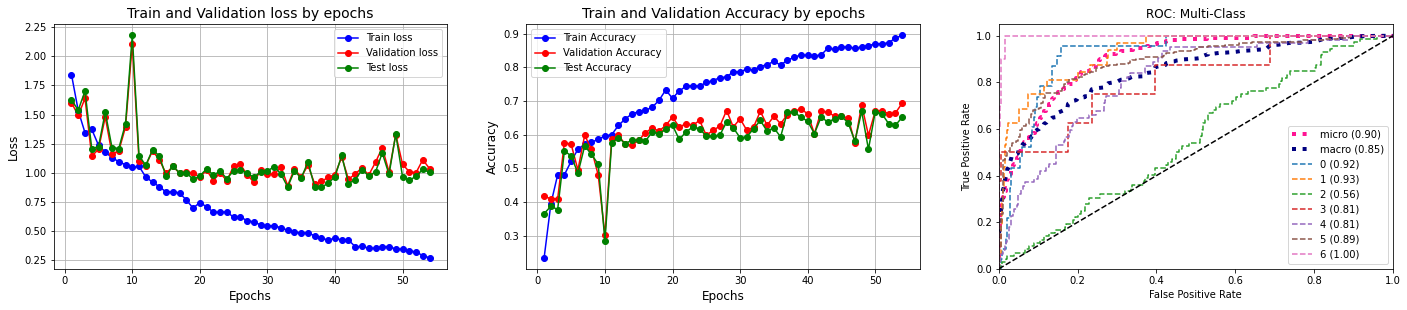

In [21]:
for m in models_list:
    # print('Mode: ', m)
    GridSrach = pickle.load(open(G_path  + '/08_Saved_Models_Outpus/Grid_Search_Results/' + m , 'rb'))
    details_ = GridSrach.iloc[[0]]
    if 0.7 > (details_.valid_accuracy[0] ) > 0.68:
    
    # if m:   
        print('Mode: ', m)
        print('Hyper params: ', details_.hyper_param.iloc[[0]])
        # print('Test overall Metric ', details_.test_overall_metric[0])
        print('Valid Accuracy ', details_.valid_accuracy[0])
        print('Valid Specificity: ', details_.valid_specificity[0])
        print('Train Loss: ', mean(details_.train_epoch_loss[0][-5:]))
        print('Valid Loss: ', mean(details_.valid_epoch_loss[0][-5:]))
        # print('Balanced test Recall : ', details_.test_loss[0])
        plot_grid_results2(details_)

In [47]:
GridSrach = pickle.load(open(G_path  + '/08_Saved_Models_Outpus/Grid_Search_Results/' + m , 'rb'))

In [48]:
GridSrach

,model_name,hyper_param,test_accuracy,valid_accuracy,train_accuracy,test_specificity,valid_specificity,train_epoch_loss,train_epoch_acc,valid_epoch_loss,valid_epoch_acc,test_epoch_acc,test_epoch_loss,test_fpr,test_tpr,test_roc_auc,train_index,valid_index
,CNN_280x210_MultiClassModel5_12_Jul22_20_56,"{'Drop': 0.25, 'LR': 0.0015, 'Momentum': 0.77, 'Net': <class 'features.NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0.001}",0.619165,0.628993,0.875997,0.914398,0.911489,"[1.9125069151654768, 1.7970376947279751, 1.6670488438537816, 1.4893638460259688, 1.3751505085726103, 1.306832136719991, 1.27322117649197, 1.2317569110382116, 1.2233623562817368, 1.187692430315976, 1.1711061990432192, 1.1199042089818196, 1.0945695202316394, 1.0672212936091081, 1.0496014426484632,...","[0.19637161084529506, 0.27731259968102073, 0.3440988835725678, 0.4286283891547049, 0.4611244019138756, 0.49362041467304624, 0.5037878787878788, 0.523524720893142, 0.5285087719298246, 0.5396730462519936, 0.5532296650717703, 0.5717703349282297, 0.5859250398724083, 0.5877192982456141, 0.59509569377...","[1.8035174888723038, 1.5987633116105024, 1.4903220709632425, 1.253835898988387, 1.2443933416815365, 1.4656583491493673, 1.2077848034746506, 1.2861473700579475, 1.5658265632741593, 2.382939240511726, 1.2307019654442282, 1.170318463269402, 1.3014774567940657, 1.2898160534746506, 1.0386277332025415...","[0.2867647058823529, 0.36764705882352944, 0.47549019607843135, 0.5318627450980392, 0.5490196078431373, 0.5, 0.5637254901960784, 0.5686274509803921, 0.4485294117647059, 0.14705882352941177, 0.571078431372549, 0.5784313725490197, 0.553921568627451, 0.5343137254901961, 0.5906862745098039, 0.5931372...","[0.23529411764705882, 0.3357843137254902, 0.44362745098039214, 0.5122549019607843, 0.5098039215686274, 0.4583333333333333, 0.5245098039215687, 0.5245098039215687, 0.4068627450980392, 0.14950980392156862, 0.5294117647058824, 0.5490196078431373, 0.517156862745098, 0.5147058823529411, 0.56372549019...","[1.8109269913505106, 1.6232576510485481, 1.5439617703942692, 1.3177593595841353, 1.294379844385035, 1.5401785934672636, 1.2765061154085047, 1.3448078001246733, 1.6160188983468449, 2.471636323367848, 1.3112142576890833, 1.2295998545253979, 1.3574496086905985, 1.3440798380795647, 1.064448682700886...","{0: [0.0, 0.0026041666666666665, 0.005208333333333333, 0.005208333333333333, 0.0078125, 0.0078125, 0.010416666666666666, 0.010416666666666666, 0.020833333333333332, 0.020833333333333332, 0.028645833333333332, 0.028645833333333332, 0.0390625, 0.0390625, 0.041666666666666664, 0.041666666666666664,...","{0: [0.0, 0.0, 0.0, 0.043478260869565216, 0.043478260869565216, 0.21739130434782608, 0.21739130434782608, 0.2608695652173913, 0.2608695652173913, 0.34782608695652173, 0.34782608695652173, 0.391304347826087, 0.391304347826087, 0.43478260869565216, 0.43478260869565216, 0.5217391304347826, 0.521739...","{0: 0.915421195652174, 1: 0.9138333333333334, 2: 0.5420398009950248, 3: 0.806077694235589, 4: 0.8065451145395044, 5: 0.8853381642512078, 6: 0.9974811083123426, 'micro': 0.8878210352411826, 'macro': 0.8394714369004049}",None,None


# **Import Model**

In [8]:
# **Import Model**
C_280 = 'CNN_280x210_MultiClassModel1_12_Jul22_18_15' # Best of grid search ['CNN_280x210_Model5_23_Jun22_12-55','CNN_280x210_Model4_22_Jun22_00-14]
C_280_binary = 'CNN_280x210_Binary_24_Jun22_22-17'

CNN_280x210_multi = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/'+ C_280 , 'rb') ).eval()
CNN_280x210_binary = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/'+ C_280_binary , 'rb') ).eval()

A_E = 'A_E_CNN_Model6_22_Jun22_00-29' #Best of grid search
A_E_binary = 'A_E_CNN_Model0_25_Jun22_09-35'

# [CNN_Nets.Net8_a, Model_Training_with_loader] = pickle.load(open(G_Models+'/Net8_Model_Trainin','rb'))
CNN_A_En_multiclass = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/' + A_E , 'rb') ).eval()
CNNA_En_binary = pickle.load(open(G_path + '/08_Saved_Models_Outpus/Models/CNN_Grid_Search_Models/' + A_E_binary , 'rb') ).eval()


# **Import DataSets**

In [9]:
file = 'Input_DataSet_280x210' 
input_data , labels = pickle.load(open(G_path + '/06_Rescaled_DataSet/'+ file,'rb'))
labels_biary = labels[1]
labels_multi = labels[0]

file = 'Input_DataSet_A_E' 
A_E_input_data , A_E_labels = pickle.load(open(G_path + '/05_AutoEncoded_DataSet/'+ file,'rb'))
A_E_labels_biary = A_E_labels[1]
A_E_labels_multi = A_E_labels[0]

file = 'Balanced_Test_Set_280x210' 
BLC_test_280x210 = pickle.load(open(G_path + '/06_Rescaled_DataSet/' + file,'rb'))

file = 'Balanced_Test_Set_A_E' 
BLC_test_A_E = pickle.load(open(G_path + '/05_AutoEncoded_DataSet/' + file,'rb'))

Meta_Data_Augmented = pickle.load(open( G_path + '/02_Augmented_MetaData/Meta_Data_Augmented','rb'))

Nr. of Data : 
 407
Accuracy of The Model : 
 0.6732186732186732


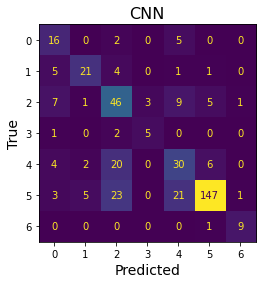

,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,5.7%,44.4%,69.6%,94.8%,54.2%
1,7.9%,72.4%,65.6%,97.9%,68.9%
2,17.7%,47.4%,63.9%,84.8%,54.4%
3,2.0%,62.5%,62.5%,99.2%,62.5%
4,15.2%,45.5%,48.4%,89.6%,46.9%
5,49.1%,91.9%,73.5%,93.7%,81.7%
6,2.5%,81.8%,90.0%,99.5%,85.7%
Simple Avg.,nan%,63.7%,67.6%,94.2%,64.9%
Weighted Avg.,nan%,71.9%,67.3%,92.1%,68.7%


In [10]:
# Model 280x210
Evaluation_set = 'test'  #{train, valid, test, balanced_test}
Multi_to_binary = False
model = CNN_280x210_multi  # {CNN_280x210_multi, CNN_A_En_multiclass}

if Evaluation_set == 'train': i = 0
elif Evaluation_set == 'valid': i=1
elif Evaluation_set == 'test': i=2

if Evaluation_set == 'balanced_test':
    if model in [CNN_280x210_multi, CNN_280x210_binary]:
        X = BLC_test_280x210[0]
        Y = BLC_test_280x210[1]
    else:
        X = BLC_test_A_E[0]
        Y = BLC_test_A_E[1]       
else:
    if Evaluation_set == 'train': i = 0
    elif Evaluation_set == 'valid': i=1
    elif Evaluation_set == 'test': i=2
    if model in [CNN_280x210_multi, CNN_280x210_binary]:
        X = input_data[i]
        Y = labels_multi[i]
    else:
        X = A_E_input_data[i]
        Y = A_E_labels_multi[i]  

n = 100
iter = X.shape[0] // n
Y_pred = torch.zeros(0)
Y_pred_prob = torch.zeros(0)
for i in range(iter+1):
    X_ = X[i*n:(i+1)*n].detach()
    Y_prob = torch.softmax(model.forward_noDrop(X_),dim=1).detach()
    Y_ = model.forward_noDrop(X_).argmax(dim=1).detach()
    Y_pred = torch.cat([Y_pred,Y_]).detach()
    Y_pred_prob = torch.cat([Y_pred_prob,Y_prob]).detach()

if Multi_to_binary:
    Y_binary =  label_to_binary(Y)
    Y_pred_binary =  label_to_binary(Y_pred)
    results = model_evaluation(Y_binary,Y_pred_binary)
else:
    results = model_evaluation(Y,Y_pred,'CNN')
results